In [1]:
import numpy as np
import pickle
from matplotlib import pyplot as plt

In [2]:
from IPython import display
from scipy import interpolate

In [3]:
folder = './dataset/20160/2_poles/noise50/'

In [4]:
with open (folder + 'slow_2mat_20148_noise.pkl', 'rb') as fp:
    data_X2 = pickle.load(fp) # all values 0 or 1

In [5]:
# # noise
# with open ('./dataset/20160/2_poles/noise25_2/slow_2mat_20160.pkl', 'rb') as fp:
#     data_X1 = pickle.load(fp) # all values 0 or 1

In [6]:
# data_X = np.concatenate([data_X1, data_X2])
data_X = data_X2

In [7]:
print(data_X.shape)

(20148, 73, 2, 2)


In [12]:
dataset_size = 20148
# dataset_size = 4000
assert data_X.shape[0] == dataset_size

freqs for the 28148 dataset

In [13]:
# check plot_dataset.ipynb
data_freq = np.array([ 0.59941229,  0.79921638,  0.99902048,  1.19882458,  1.39862867,
        1.59843277,  1.79823686,  1.99804096,  2.19784506,  2.39764915,
        2.59745325,  2.79725735,  2.99706144,  3.19686554,  3.39666963,
        3.59647373,  3.79627783,  3.99608192,  4.19588602,  4.39569011,
        4.59549421,  4.79529831,  4.9951024 ,  5.1949065 ,  5.39471059,
        5.59451469,  5.79431879,  5.99412288,  6.19392698,  6.39373107,
        6.59353517,  6.79333927,  6.99314336,  7.19294746,  7.39275155,
        7.59255565,  7.79235975,  7.99216384,  8.19196794,  8.39177204,
        8.59157613,  8.79138023,  8.99118432,  9.19098842,  9.39079252,
        9.59059661,  9.79040071,  9.9902048 , 10.1900089 , 10.389813  ,
       10.58961709, 10.78942119, 10.98922528, 11.18902938, 11.38883348,
       11.58863757, 11.78844167, 11.98824576, 12.18804986, 12.38785396,
       12.58765805, 12.78746215, 12.98726625, 13.18707034, 13.38687444,
       13.58667853, 13.78648263, 13.98628673, 14.18609082, 14.38589492,
       14.58569901, 14.78550311, 14.98530721])
print(data_freq.shape)

(73,)


In [11]:
# # cut monopole freqs (for stonely)
# idx1_start = np.where(data_freq - 0.5 > 0)[0][0]
# idx1_end = np.where(data_freq - 6 > 0)[0][0]
# # cut dipole freqs for 1st dipole
# idx2_start = np.where(data_freq - 2 > 0)[0][0]
# idx2_end = np.where(data_freq - 7 > 0)[0][0]

In [12]:
# print(idx1_start, idx1_end, idx2_start, idx2_end)
# print(data_freq[idx1_start], data_freq[idx1_end], data_freq[idx2_start], data_freq[idx2_end])

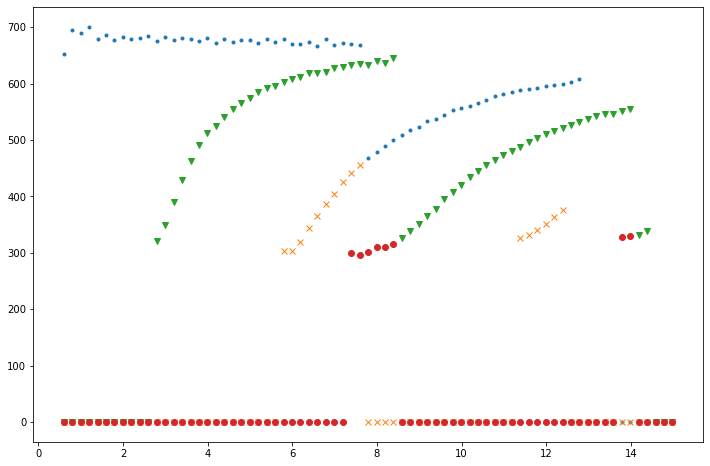

In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
n = 0
ax.plot(data_freq, data_X[n, :, 1, 1],'.')
ax.plot(data_freq, data_X[n, :, 0, 1],'x')
ax.plot(data_freq, data_X[n, :, 1, 0],'v')
ax.plot(data_freq, data_X[n, :, 0, 0],'o')

detect curve parts for the whole dataset

In [14]:
# def detect_non_zeros(k,j):
#     ones = np.ones(len(data_freq))
#     num_of_nonzero = np.zeros(len(data_freq))
#     for i in range(data_X.shape[0]):
#         idx_non0 = np.where(data_X[i, :, k, j] > 0)
#         num_of_nonzero[idx_non0] += ones[idx_non0]
#     idx = np.where(num_of_nonzero > 15000)
#     fig, ax = plt.subplots(1,2)
#     fig.set_size_inches(8,2)
#     ax[0].plot(data_freq, num_of_nonzero, '.')
#     ax[1].plot(data_freq[idx], num_of_nonzero[idx], 'x')
#     return num_of_nonzero, idx

In [15]:
# # first monopole
# num_of_nonzero_1m, idx_1m = detect_non_zeros(1,1)
# # second monopole
# num_of_nonzero_2m, idx_2m = detect_non_zeros(0,1)

In [16]:
# # first dipole
# num_of_nonzero_1d, idx_1d = detect_non_zeros(1,0)
# # second dipole
# num_of_nonzero_2d, idx_2d = detect_non_zeros(0,0)

In [17]:
# calc mu
mu_curve = np.zeros([len(data_freq), 2, 2])
for i in range(dataset_size):
    mu_curve[:, 0, 0] += data_X[i, :, 0, 0]
    mu_curve[:, 0, 1] += data_X[i, :, 0, 1]
    mu_curve[:, 1, 0] += data_X[i, :, 1, 0]
    mu_curve[:, 1, 1] += data_X[i, :, 1, 1]
mu_curve /= data_X.shape[0]

In [18]:
# calc std
std_curve = np.zeros([len(data_freq), 2, 2])
for i in range(dataset_size):
    std_curve[:, 0, 0] += (data_X[i, :, 0, 0] - mu_curve[:, 0, 0])**2/dataset_size
    std_curve[:, 0, 1] += (data_X[i, :, 0, 1] - mu_curve[:, 0, 1])**2/dataset_size
    std_curve[:, 1, 0] += (data_X[i, :, 1, 0] - mu_curve[:, 1, 0])**2/dataset_size
    std_curve[:, 1, 1] += (data_X[i, :, 1, 1] - mu_curve[:, 1, 1])**2/dataset_size
std_curve = np.sqrt(std_curve)

Text(0.5, 1.0, 'std curve')

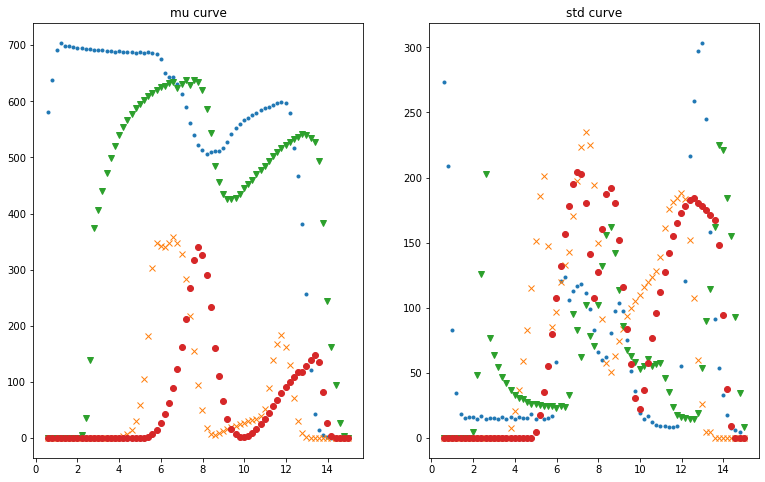

In [19]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(13,8)
ax[0].plot(data_freq, mu_curve[:, 1, 1], '.')
ax[0].plot(data_freq, mu_curve[:, 0, 1], 'x')
ax[0].plot(data_freq, mu_curve[:, 1, 0], 'v')
ax[0].plot(data_freq, mu_curve[:, 0, 0], 'o')
ax[0].set_title('mu curve')
# --------------- #
ax[1].plot(data_freq, std_curve[:, 1, 1], '.')
ax[1].plot(data_freq, std_curve[:, 0, 1], 'x')
ax[1].plot(data_freq, std_curve[:, 1, 0], 'v')
ax[1].plot(data_freq, std_curve[:, 0, 0], 'o')
ax[1].set_title('std curve')

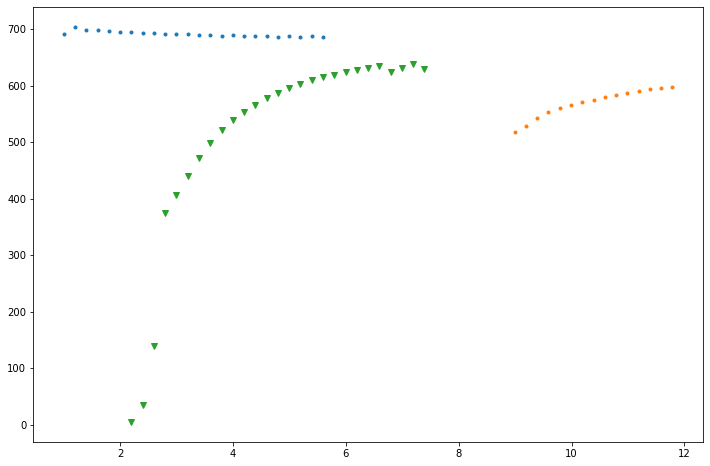

In [20]:
# (s == start; e == end)
# 1 or 2 == mode number
# d == dipole; m == monopole
# a, b - part
# ----------------------------------- #
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
# first monopole
s1m = 2; e1m = 26
ax.plot(data_freq[s1m:e1m], mu_curve[s1m:e1m, 1, 1],'.', color='tab:blue')
# second monopole
s2m_a = 42; e2m_a = 57
ax.plot(data_freq[s2m_a:e2m_a], mu_curve[s2m_a:e2m_a, 1, 1],'.', color='tab:orange')
# s2m_b = 13; e2m_b = 33
# ax.plot(data_freq[s2m_b:e2m_b], mu_curve[s2m_b:e2m_b, 0, 1],'x', color='tab:orange')
# first dipole
s1d = 8; e1d = 35
ax.plot(data_freq[s1d:e1d], mu_curve[s1d:e1d, 1, 0],'v', color='tab:green')
# second dipole
# s2d_a = 14; e2d_a = 37
# ax.plot(data_freq[s2d_a:e2d_a], mu_curve[s2d_a:e2d_a, 0, 0], 'o', color='tab:red')
# s2d_b = 46; e2d_b = 67
# ax.plot(data_freq[s2d_b:e2d_b], mu_curve[s2d_b:e2d_b, 1, 0],'v', color='tab:red')

dataset construction

In [21]:
# 3 parts
input_shape = \
e1d - s1d + \
e1m - s1m + \
e2m_a - s2m_a
print(input_shape)

66


In [22]:
# # 6 parts
# input_shape = \
# e1d - s1d + \
# e1m - s1m + \
# e2d_a - s2d_a + \
# e2d_b - s2d_b + \
# e2m_a - s2m_a + \
# e2m_b - s2m_b
# print(input_shape)

In [23]:
# flatten
data_X_new = np.zeros([data_X.shape[0], input_shape])
for i in range(data_X.shape[0]):
    # first dipole
    flat_arr_temp = data_X[i,s1d:e1d,1,0]
    # second dipole
#     flat_arr_temp = np.append(flat_arr_temp, data_X[i,s2d_a:e2d_a,0,0])
#     flat_arr_temp = np.append(flat_arr_temp, data_X[i,s2d_b:e2d_b,1,0])
    # first monopole
    flat_arr_temp = np.append(flat_arr_temp, data_X[i,s1m:e1m,1,1])
    # second monopole
#     flat_arr_temp = np.append(flat_arr_temp, data_X[i,s2m_b:e2m_b,0,1])
    flat_arr_temp = np.append(flat_arr_temp, data_X[i,s2m_a:e2m_a,1,1])
    data_X_new[i, :] = flat_arr_temp

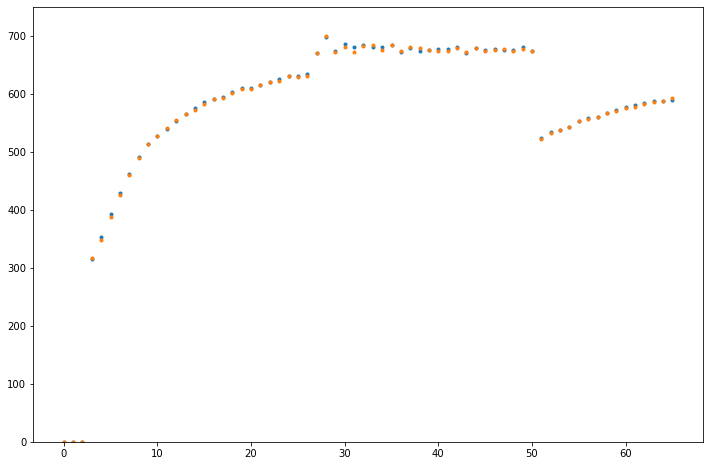

In [24]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
# for i in range(10000,data_X_new.shape[0],2):
for i in range(1,2):
    ax.cla()
    ax.plot(data_X_new[i, :],'.')
    ax.plot(data_X_new[i+1, :],'.')
#     ax.set_ylim([-1, 1])
    ax.set_ylim([0, 750])
    display.display(fig)
    display.clear_output(wait = True)

In [25]:
# with open(folder + 'dataX_extracted20148_noise.pkl', 'wb') as fp:
#     pickle.dump(data_X_new, fp)

In [ ]:
data_X_new.shape

### ----------------- #

#### the same with safe dataset

In [ ]:
dataset_size = 300

load safe

In [ ]:
safe_extra300_params = np.zeros([dataset_size, 7])
safe_extra300_freq = np.zeros(30)
safe_extra300_slow = np.zeros([dataset_size, 30, 6])
for i in range(dataset_size):
    params_read = np.loadtxt('./dataset/safe_extra300/my_output/'+str(i)+'_my_params.txt', delimiter=',')
    data_read = np.loadtxt('./dataset/safe_extra300/my_output/'+str(i)+'_out_data.txt', delimiter=',')
    safe_extra300_params[i, :] = params_read
    safe_extra300_slow[i, :, :] = data_read[:, 1:]/0.3048
    if i == 0:
        safe_extra300_freq[:] = data_read[:,0]

In [ ]:
safe_extra300_slow.shape

In [ ]:
_ = plt.plot(safe_extra300_slow[0, :, :], '.')

interpolate

In [ ]:
safe_extra300_slow_interp = np.zeros([dataset_size, len(data_freq), 4])

In [ ]:
for i in range(dataset_size):
    f0 = interpolate.interp1d(safe_extra300_freq, safe_extra300_slow[i, :, 0])
    f1 = interpolate.interp1d(safe_extra300_freq, safe_extra300_slow[i, :, 1])
    f2 = interpolate.interp1d(safe_extra300_freq, safe_extra300_slow[i, :, 2])
    f3 = interpolate.interp1d(safe_extra300_freq, safe_extra300_slow[i, :, 3])
    safe_extra300_slow_interp[i, :, 0] = f0(data_freq)
    safe_extra300_slow_interp[i, :, 1] = f1(data_freq)
    safe_extra300_slow_interp[i, :, 2] = f2(data_freq)
    safe_extra300_slow_interp[i, :, 3] = f3(data_freq)

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,8)
i = 100
ax.plot(data_freq, safe_extra300_slow_interp[i, :, 0], '.')
ax.plot(data_freq, safe_extra300_slow_interp[i, :, 1], 'x')
ax.plot(data_freq, safe_extra300_slow_interp[i, :, 2], 'v')
ax.plot(data_freq, safe_extra300_slow_interp[i, :, 3], 'o')

In [ ]:
safe_extra300_slow_new = np.zeros([dataset_size, input_shape])
for i in range(dataset_size):
    # first dipole
    flat_arr_temp = safe_extra300_slow_interp[i,s1d:e1d,2]
    # second dipole
#     flat_arr_temp = np.append(flat_arr_temp, safe_extra300_slow_interp[i,s2d_a:e2d_a,1])
#     flat_arr_temp = np.append(flat_arr_temp, safe_extra300_slow_interp[i,s2d_b:e2d_b,1])
    # first monopole
    flat_arr_temp = np.append(flat_arr_temp, safe_extra300_slow_interp[i,s1m:e1m,0])
    # second monopole
#     flat_arr_temp = np.append(flat_arr_temp, safe_extra300_slow_interp[i,s2m_b:e2m_b,1])
    flat_arr_temp = np.append(flat_arr_temp, safe_extra300_slow_interp[i,s2m_a:e2m_a,1])
    safe_extra300_slow_new[i, :] = flat_arr_temp

In [ ]:
_ = plt.plot(safe_extra300_slow_new[0, :], '.')

In [ ]:
_ = plt.plot(data_X_new[500, :], '.')
_ = plt.plot(safe_extra300_slow_new[90, :], '.')

In [ ]:
# with open('./dataset/safe_extra300/safe_X_extracetd_modes.pkl', 'wb') as fp:
#     pickle.dump(safe_extra300_slow_new, fp)

In [ ]:
# fig, ax = plt.subplots()
# fig.set_size_inches(12, 8)
# for i in range(300):
#     ax.cla()
#     ax.plot(data_X_new[i, :],'.')
#     ax.plot(data_X_new[20148+i, :],'.')
#     ax.plot(safe_extra300_slow_new[i, :],'.')
#     ax.set_ylim([0, 750])
#     display.display(fig)
#     display.clear_output(wait = True)

### ----------------------

#### the same with sens21 dataset

In [ ]:
with open ('./dataset/sens_full_vti_21/data_sens21.pkl', 'rb') as fp:
    data_sens21 = pickle.load(fp)
print(data_sens21.keys())

In [ ]:
print(data_sens21['data_slow'].shape)
print(data_sens21['safe_slow'].shape)

In [ ]:
# slowness sorting
for i in range(data_sens21['data_slow'].shape[0]):
    for j in range(data_sens21['data_slow'].shape[2]):
        for k in range(data_sens21['data_slow'].shape[1]):
            idx = np.argsort(data_sens21['data_slow'][i,k,:,j])
            data_sens21['data_slow'][i,k,:,j] = data_sens21['data_slow'][i,k,idx,j]
            #data_amps[i,k,:,j] = data_amps[i,k,idx,j]

In [ ]:
plt.plot(data_sens21['data_freq'], data_sens21['data_slow'][0, :, :, 0], 'o')
plt.plot(data_sens21['data_freq'], data_sens21['data_slow'][0, :, :, 1], 'o')
plt.plot(data_sens21['safe_freq'], data_sens21['safe_slow'][0, :, :], 'k.')

In [ ]:
# cut freqs
freq_start_idx = np.where(data_sens21['data_freq'] - 0.5 > 0)[0][0]
freq_end_idx = np.where(data_sens21['data_freq'] - 15 > 0)[0][0]
data_freq_new = data_sens21['data_freq'][freq_start_idx:freq_end_idx]
print(len(data_freq_new))
data_slow21 = np.zeros([21, len(data_freq_new), 2, 2])
for i in range(21):
    for j in range(2):
        for k in range(2):
            data_slow21[i, :, j, k] = data_sens21['data_slow'][i, freq_start_idx:freq_end_idx, j, k]
print(data_slow21.shape)

In [ ]:
# interpolate safe data
safe_sens21 = np.zeros([21, len(data_freq_new), 4])
for i in range(21):
    f0 = interpolate.interp1d(data_sens21['safe_freq'], data_sens21['safe_slow'][i, :, 0])
    f1 = interpolate.interp1d(data_sens21['safe_freq'], data_sens21['safe_slow'][i, :, 1])
    f2 = interpolate.interp1d(data_sens21['safe_freq'], data_sens21['safe_slow'][i, :, 2])
    f3 = interpolate.interp1d(data_sens21['safe_freq'], data_sens21['safe_slow'][i, :, 3])
    safe_sens21[i, :, 0] = f0(data_freq)
    safe_sens21[i, :, 1] = f1(data_freq)
    safe_sens21[i, :, 2] = f2(data_freq)
    safe_sens21[i, :, 3] = f3(data_freq)
print(safe_sens21.shape)

In [ ]:
plt.plot(data_freq_new, data_slow21[0, :, :, 0], 'o')
plt.plot(data_freq_new, data_slow21[0, :, :, 1], 'o')
plt.plot(data_freq_new, safe_sens21[0, :, :], 'k.')

In [ ]:
# falt dataX 21
data_slow21_new = np.zeros([21, input_shape])
for i in range(21):
    # first dipole
    flat_arr_temp = data_slow21[i,s1d:e1d,1,0]
    # second dipole
#     flat_arr_temp = np.append(flat_arr_temp, data_slow21[i,s2d_a:e2d_a,0,0])
#     flat_arr_temp = np.append(flat_arr_temp, data_slow21[i,s2d_b:e2d_b,1,0])
    # first monopole
    flat_arr_temp = np.append(flat_arr_temp, data_slow21[i,s1m:e1m,1,1])
    # second monopole
#     flat_arr_temp = np.append(flat_arr_temp, data_slow21[i,s2m_b:e2m_b,0,1])
    flat_arr_temp = np.append(flat_arr_temp, data_slow21[i,s2m_a:e2m_a,1,1])
    data_slow21_new[i, :] = flat_arr_temp

In [ ]:
# flat safe 21
safe_sens21_new = np.zeros([21, input_shape])
for i in range(21):
    # first dipole
    flat_arr_temp = safe_sens21[i,s1d:e1d,2]
    # second dipole
#     flat_arr_temp = np.append(flat_arr_temp, safe_sens21[i,s2d_a:e2d_a,1])
#     flat_arr_temp = np.append(flat_arr_temp, safe_sens21[i,s2d_b:e2d_b,1])
    # first monopole
    flat_arr_temp = np.append(flat_arr_temp, safe_sens21[i,s1m:e1m,0])
    # second monopole
#     flat_arr_temp = np.append(flat_arr_temp, safe_sens21[i,s2m_b:e2m_b,1])
    flat_arr_temp = np.append(flat_arr_temp, safe_sens21[i,s2m_a:e2m_a,1])
    safe_sens21_new[i, :] = flat_arr_temp

In [ ]:
plt.plot(data_slow21_new[0, :], 'o')
plt.plot(safe_sens21_new[0, :], '.')

In [ ]:
data_sens21_extracted_flat = {
    'data_slow21_new' : data_slow21_new,
    'safe_sens21_new' : safe_sens21_new,
}

In [ ]:
# with open('./dataset/sens_full_vti_21/data_sens21_extracted_flat.pkl', 'wb') as fp:
#     pickle.dump(data_sens21_extracted_flat, fp)